# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

#get the files
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip --no-verbose
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip --no-verbose


#unzip files
!unzip -qq dogImages.zip
!unzip -qq lfw.zip

2020-04-20 14:24:45 URL:https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip [1132023110/1132023110] -> "dogImages.zip" [1]
2020-04-20 14:24:58 URL:https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip [196739509/196739509] -> "lfw.zip" [1]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# load filenames for human and dog images
human_files = np.array(glob("/content/lfw/*/*"))
dog_files = np.array(glob("/content/dogImages/*/*/*"))

# print number of images i|n each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

--2020-04-20 08:14:14--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676709 (661K) [text/plain]
Saving to: ‘/content/haarcascades/haarcascade_frontalface_alt.xml’

haarcascade_frontal 100%[===================>] 660.85K  --.-KB/s    in 0.08s   

2020-04-20 08:14:14 (8.49 MB/s) - ‘/content/haarcascades/haarcascade_frontalface_alt.xml’ saved [676709/676709]

Number of faces detected: 1


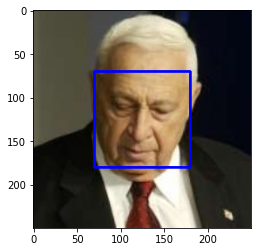

In [0]:
import cv2                
import matplotlib.pyplot as plt  
import os                      
%matplotlib inline                               


!mkdir haarcascades
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml -P /content/haarcascades


# extract pre-trained face detector
path = os.path.abspath('/content/haarcascades/haarcascade_frontalface_alt.xml')
face_cascade = cv2.CascadeClassifier(path)

# load color (BGR) image
img = cv2.imread(human_files[369])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
<pre>
Percentage of human detected: 100.0
Percentage of dog detected: 10.0
</pre>

In [0]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_len = len(human_files_short)
dog_len = len(dog_files_short)
print("Total number of human images:  ", human_len)
print("Total number of Dog images: ", dog_len)

detected_humans = 0
undetected_human_img_index = []

detected_dogs = 0
undetected_dog_img_index = []

for i in  range(0, human_len):
    human = face_detector(human_files_short[i])
    if human == True:
        detected_humans += 1
    else:
        undetected_human_img_index.append(i)

for j in range(0, dog_len):
    dog = face_detector(dog_files_short[j])
    if dog == True:
        detected_dogs += 1
    else:
        undetected_dog_img_index.append(j)

        
print("\nNumber of human detected:  ", detected_humans)
print("Number of Dog detected: ", detected_dogs)
print("\nPercentage of human detected: {}".format(detected_humans/ human_len * 100))
print("Percentage of dog detected: {}".format(detected_dogs / dog_len * 100))


Total number of human images:   100
Total number of Dog images:  100

Number of human detected:   100
Number of Dog detected:  10

Percentage of human detected: 100.0
Percentage of dog detected: 10.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### Optional
### TODO: Test performance of anotherface detection algorithm.
from tqdm import tqdm


human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml -P /content/haarcascades
path = os.path.abspath('/content/haarcascades/haarcascade_frontalface_alt2.xml')
#Extract pretrained 
face_alt2 = cv2.CascadeClassifier(path)

# Returns true if face is detected
def face_detector_lbp(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_alt2.detectMultiScale(gray)
    return len(faces) > 0


human_len = len(human_files_short)
dog_len = len(dog_files_short)
print("Total number of human images:  ", human_len)
print("Total number of Dog images: ", dog_len)

detected_humans = 0
undetected_human_img_index = []

detected_dogs = 0
undetected_dog_img_index = []

for i in  range(0, human_len):
    human = face_detector_lbp(human_files_short[i])
    if human == True:
        detected_humans += 1
    else:
        undetected_human_img_index.append(i)

for j in range(0, dog_len):
    dog = face_detector_lbp(dog_files_short[j])
    if dog == True:
        detected_dogs += 1
    else:
        undetected_dog_img_index.append(j)

        
print("\nNumber of human detected:  ", detected_humans)
print("Number of Dog detected: ", detected_dogs)


print("\nPercentage of human detected: {}".format(detected_humans/ human_len * 100))
print("Percentage of dog detected: {}".format(detected_dogs / dog_len * 100))


--2020-04-09 16:17:39--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 540616 (528K) [text/plain]
Saving to: ‘/content/haarcascades/haarcascade_frontalface_alt2.xml.1’

haarcascade_frontal 100%[===================>] 527.95K  --.-KB/s    in 0.06s   

2020-04-09 16:17:39 (8.20 MB/s) - ‘/content/haarcascades/haarcascade_frontalface_alt2.xml.1’ saved [540616/540616]

Total number of human images:   100
Total number of Dog images:  100

Number of human detected:   99
Number of Dog detected:  23

Percentage of human detected: 99.0
Percentage of dog detected: 23.0


<pre>
haarcascade_frontalface_alt2.xml:
Percentage of human detected: 99.0
Percentage of human detected: 23

This alt_2 version of haarcascade_frontalface works best for detecting human faces i.e 99% but 
unfortunately It detected 23% dog faces as humans. So that means this can be used to detect the human face but not dog face. We have to use deep learning to do this dog face detection. 
</pre>

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    img_to_tensor =  transforms.Compose([
        transforms.resize(227),
        transforms.CenterCrop(227),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    img_pil = Image.open(img_path)
    img = img_to_tensor(img_pil)
#     print("Image type: ", img.type())
#     print("shape without unsqueezing: ", img.shape)
#     print("After unsqueezing: ",img.unsqueeze_(0).shape)
    prediction = VGG16(img.unsqueeze(0))
    ## Return the *index* of the predicted class for that image
    

    return prediction.data.numpy().argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if VGG16_predict(img_path) >= 151 and VGG16_predict(img_path)<= 268:
        return True
    else:
        return False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ <pre>
Percentage of human detected as dogs: 2.0
Percentage of dogs detected as dogs: 99.0</pre>

In [0]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_len = len(human_files_short)
dog_len = len(dog_files_short)

print("Total number of human images:  ", human_len)
print("Total number of Dog images: ", dog_len)

detected_humans_as_dogs = 0
detected_dogs_as_dogs = 0

undetected_human_img_index = []
undetected_dog_img_index = []

for i in  range(0, human_len):
    human = dog_detector(human_files_short[i])
    if human == True:
        detected_humans_as_dogs += 1
    else:
        undetected_human_img_index.append(i)

for j in range(0, dog_len):
    dog = dog_detector(dog_files_short[j])
    if dog == True:
        detected_dogs_as_dogs += 1
    else:
        undetected_dog_img_index.append(j)

        
print("\nNumber of human detected as dogs:  ", detected_humans_as_dogs)
print("Number of Dog detected as dogs: ", detected_dogs_as_dogs)


print("\nPercentage of human detected as dogs: {}".format(detected_humans_as_dogs/ human_len * 100))
print("Percentage of dogs detected as dogs: {}".format(detected_dogs_as_dogs / dog_len * 100))


Total number of human images:   100
Total number of Dog images:  100

Number of human detected as dogs:   3
Number of Dog detected as dogs:  96

Percentage of human detected as dogs: 3.0
Percentage of dogs detected as dogs: 96.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
alexnet = models.alexnet(pretrained=True)
densenet = models.densenet161(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
mnasnet = models.mnasnet1_0(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
squeezenet = models.squeezenet1_0(pretrained=True)
mobilenet = models.mobilenet_v2(pretrained=True)


           ########### Helper functions ###################
def preprocess(img_path):
    """
    Args:
        img_path : a raw image path location
    Returns:
        image of type tensor
    
    """
    img_to_tensor =  transforms.Compose([
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])
    img_pil = Image.open(img_path)
    img = img_to_tensor(img_pil)
    return img


def model_predict(img_path, model):
    img = preprocess(img_path)
    prediction = model(img.unsqueeze(0))
    prediction_bool = prediction.data.numpy().argmax() # predicted class index
    if prediction_bool >= 151 and prediction_bool<= 268:
        return True
    else:
        return False
    
    
def dog_detectron(img_path_humans, img_path_dogs, models_dict):
  """
  """"Iteratively prints accuracy on human and dogs images """"
  Args: 
    img_path_humans : folder location of human images
    img_path_dogs: folder location of dog images
    models_dict: dictionary containing model and each of value string i.e {vgg16:'vgg16',....}
  Returns:
    None
  
  """
  for model, name in models_dict.items():
    if torch.cuda.is_available() == True:
      model = model.cuda()
    human_len = len(img_path_humans)
    dog_len = len(img_path_dogs)
    print("================={}=================".format(name))
    print("Total number of human images:  ", human_len)
    print("Total number of Dog images: ", dog_len)

    detected_humans_as_dogs = 0
    detected_dogs_as_dogs = 0

    undetected_human_img_index = []
    undetected_dog_img_index = []

    for i in  range(0, human_len):
        human = model_predict(img_path_humans[i], model)
        if human == True:
            detected_humans_as_dogs += 1
        else:
            undetected_human_img_index.append(i)

    for j in range(0, dog_len):
        dog = model_predict(img_path_dogs[j],  model)
        if dog == True:
            detected_dogs_as_dogs += 1
        else:
            undetected_dog_img_index.append(j)


    print("\nNumber of human detected as dogs:  ", detected_humans_as_dogs)
    print("Number of Dog detected as dogs: ", detected_dogs_as_dogs)


    print("\nPercentage of human detected as dogs: {}".format(detected_humans_as_dogs/ human_len * 100))
    print("Percentage of dogs detected as dogs: {}".format(detected_dogs_as_dogs / dog_len * 100))
    print("\n")

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/checkpoints/googlenet-1378be20.pth


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/checkpoints/shufflenetv2_x1-5666bf0f80.pth


Downloading: "https://download.pytorch.org/models/mnasnet1.0_top1_73.512-f206786ef8.pth" to /root/.cache/torch/checkpoints/mnasnet1.0_top1_73.512-f206786ef8.pth


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/checkpoints/resnext50_32x4d-7cdf4587.pth


Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/checkpoints/wide_resnet50_2-95faca4d.pth


Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/checkpoints/squeezenet1_0-a815701f.pth


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth


In [0]:
models_dict = {
    densenet: 'DenseNet',
    googlenet: "GoogleNet",
    shufflenet: "shufflenet",
    mnasnet: "mnasnet",
    alexnet:  "AlexNet",
    resnext50_32x4d: 'resnext50_32',
    wide_resnet50_2: 'wide_resnet50',
    squeezenet: "squeezenet",
    mobilenet: "mobilenet"
}

dog_detectron(human_files_short, dog_files_short, models_dict)

=================DenseNet=================
Total number of human images:   100
Total number of Dog images:  100

Number of human detected as dogs:   0
Number of Dog detected as dogs:  0

Percentage of human detected as dogs: 0.0
Percentage of dogs detected as dogs: 0.0


=================GoogleNet=================
Total number of human images:   100
Total number of Dog images:  100

Number of human detected as dogs:   4
Number of Dog detected as dogs:  1

Percentage of human detected as dogs: 4.0
Percentage of dogs detected as dogs: 1.0


=================shufflenet=================
Total number of human images:   100
Total number of Dog images:  100

Number of human detected as dogs:   16
Number of Dog detected as dogs:  11

Percentage of human detected as dogs: 16.0
Percentage of dogs detected as dogs: 11.0


=================mnasnet=================
Total number of human images:   100
Total number of Dog images:  100

Number of human detected as dogs:   0
Number of Dog detected as d

In [0]:
vgg19 = models.vgg19(pretrained=True)
dog_detectron(human_files_short, dog_files_short, {vgg19:'vgg19'})

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth



=================vgg19=================
Total number of human images:   100
Total number of Dog images:  100

Number of human detected as dogs:   0
Number of Dog detected as dogs:  98

Percentage of human detected as dogs: 0.0
Percentage of dogs detected as dogs: 98.0




<pre>
From Above We could easily know how model is classifying dog images.
The top performing models are 
1) AlexNet
2) SqueezeNet
3) Vgg19

More specifically , Vgg19 worked best having
Error~Number of humans detected as dogs: 0%
dogs~Number of dogs detected as dogs: 98%
Error of unclassified dogs: 2%
</pre>

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
import torch
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
batch_size = 24


## Specify appropriate transforms, and batch_sizes
normalizer = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
transformed = transforms.Compose([
    transforms.Resize((227,227)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(12),
    transforms.ToTensor(),
    normalizer
])
transformed_test = transforms.Compose([
    transforms.Resize((227,227)),
    transforms.ToTensor(),
    normalizer,    
])

train_data = datasets.ImageFolder('/content/dogImages/train', transform=transformed)
test_data = datasets.ImageFolder('/content/dogImages/test', transform=transformed_test)
valid_data = datasets.ImageFolder('/content/dogImages/valid', transform=transformed)



train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,  shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=0)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=0, shuffle=True)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

*   In order to reduce overfitting my model into test  set . I have some some of the image augmentations. I have  choose image to be of size (227x227), quite much larger size inorder to take information from images as much as possible.  
I havent used cropping or stretching, because information could lose. As features of dogs inside image could be random, some could be capture left wise or right wise, cropping may lead to lose feature information to the image. 
Similary, I havent used stretching in an image, because i want to take same shaped features of dogs inside image. 

* I have use most important augument Horizontal rotation , inorder to make similar breed of dogs available in the dataset not look same, which prevent overfitting when training. I have use vertical rotation of image 12 degree, because after training, when used in real world people can capture images of dogs at any angle, model will easily pick up the information of dog. I haven't use translation techniques , because to make image original. 


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch.nn as nn
import torch.nn.functional as F


total_dog_breeds = len(train_data.classes)

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
        self.conv1_bn = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
        self.conv2_bn = nn.BatchNorm2d(192)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
        self.conv3_bn = nn.BatchNorm2d(384)

        self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.conv4_bn = nn.BatchNorm2d(256)
        
        self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1, stride=3)
        self.conv5_bn = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)    
        self.pool4 = nn.AdaptiveAvgPool2d((6, 6))
        
        self.fc1 = nn.Linear(256 * 6 * 6, 2048)
        self.fc2 =nn.Linear(2048, 3048)
        self.fc3 = nn.Linear(3048, 4096)
        self.dropout = nn.Dropout(p=0.3)
        self.fc4 = nn.Linear(4096, total_dog_breeds)
    def forward(self, x):
        ## Define forward behavior
        x = self.conv1(x)
        x = self.conv1_bn(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.conv2_bn(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.conv3_bn(x)
        x = F.relu(x)
        
        x = self.conv4(x)
        x = F.relu(x)
        x = self.conv4_bn(x)

        x = self.conv5(x)
        x = F.relu(x)
        x = self.conv5_bn(x)
        x = self.pool3(x)
        x = self.pool4(x)

        x = F.relu(self.fc1(x.view(x.shape[0], -1)))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.dropout(x)

        x = self.fc4(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  
<pre>
I choose architecture of CNN model similar to AlexNet architecture with some modifications in it.  
My architecture consists of CNN layer which converts 
* (3, 227,227) images to shape of (64, 56, 56) where 64 is number of dimension (or used filters) with including batch size it is now on shape (24, 64, 56,56) . I have use Batch normalization to make the activations in between 0 and 1 , which makes training more faster and helps to converge faster . After I used Max pooling which changes shape of image to half of original image size.

[Convolution - BatchNorm -Relu- max pool]

As of best practices I have stacked series of them 
[Convolution - BatchNorm -Relu-  max pool]
[Convolution - BatchNorm -Relu- max pool]

For other 2 conv layer, To experiment I haven't added max pool and only added convolution block and batch norm.
[Convolution -Relu-  BatchNorm]
[Convolution - Relu  BatchNorm - Relu]

After I have used 2 pool layers just to dump image size half. Last pool is adaptive pool as suggested by Alex net architecture.
[pool]
[Adaptive-pool]

At last I've used 4 Linear layers, Second Last is Dropout layer, which i used to prevent model overfitting with probability of 0.3. 
[Relu-  fc1]
[Relu - fc1]
[Relu- fc1]
[Dropout]
[fc2]


I have used batch normalization then used activation for first 3 blocks and for other 2 block I've used relu after batch norm. This is because , as some paper suggested to use batch norm after relu but some paper suggest different. 
Summary of Architecture is as follows
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Conv2d-1           [-1, 64, 56, 56]          23,296
       BatchNorm2d-2           [-1, 64, 56, 56]             128
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
       BatchNorm2d-5          [-1, 192, 27, 27]             384
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
       BatchNorm2d-8          [-1, 384, 13, 13]             768
            Conv2d-9          [-1, 256, 13, 13]         884,992
      BatchNorm2d-10          [-1, 256, 13, 13]             512
           Conv2d-11            [-1, 256, 5, 5]         590,080
      BatchNorm2d-12            [-1, 256, 5, 5]             512
        MaxPool2d-13            [-1, 256, 2, 2]               0
AdaptiveAvgPool2d-14            [-1, 256, 6, 6]               0
           Linear-15                 [-1, 2048]      18,876,416
           Linear-16                 [-1, 3048]       6,245,352
           Linear-17                 [-1, 4096]      12,488,704
          Dropout-18                 [-1, 4096]               0
           Linear-19                  [-1, 133]         544,901
================================================================
Total params: 40,627,373
Trainable params: 40,627,373
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.59
Forward/backward pass size (MB): 7.73
Params size (MB): 154.98
Estimated Total Size (MB): 163.30
---------------------------------------------------------------
</pre>


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
lr = 0.001
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=lr)


### (IMPLEMENTATION) Train and Validate the Model

Train a[link text](https:// [link text](https:// [link text](https://)))nd validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.


In [0]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss = train_loss + (1/(batch_idx+1)) + (loss.data - train_loss)
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + (1/(batch_idx+1)) + (loss.data - valid_loss)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss  <= valid_loss_min:
            print("Validation has decreased")
            print("Saving Model........")
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model




#loaders scratch 
loaders_scratch = dict()
loaders_scratch['train'] = train_loader 
loaders_scratch['test'] = test_loader
loaders_scratch['valid'] = valid_loader


# train the model
model_scratch = train(36, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, '/content/drive/My Drive/model_scratch.pt')


model_scratch.load_state_dict(model_scratch.state_dict())

Epoch: 1 	Training Loss: 4.825479 	Validation Loss: 5.007037
Validation has decreased
Saving Model........
Epoch: 2 	Training Loss: 3.650274 	Validation Loss: 4.395642
Validation has decreased
Saving Model........
Epoch: 3 	Training Loss: 4.114444 	Validation Loss: 4.245652
Validation has decreased
Saving Model........
Epoch: 4 	Training Loss: 4.823879 	Validation Loss: 4.515919
Epoch: 5 	Training Loss: 3.950282 	Validation Loss: 4.116578
Validation has decreased
Saving Model........
Epoch: 6 	Training Loss: 4.247745 	Validation Loss: 3.970557
Validation has decreased
Saving Model........
Epoch: 7 	Training Loss: 4.453126 	Validation Loss: 4.068180
Epoch: 8 	Training Loss: 3.415722 	Validation Loss: 3.924851
Validation has decreased
Saving Model........
Epoch: 9 	Training Loss: 3.964574 	Validation Loss: 4.004134
Epoch: 10 	Training Loss: 3.482616 	Validation Loss: 4.251445
Epoch: 11 	Training Loss: 3.211427 	Validation Loss: 3.618469
Validation has decreased
Saving Model........
Epoch

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [40]:
model_scratch.load_state_dict(torch.load('/content/drive/My Drive/model_scratch.pt'))

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.589839


Test Accuracy: 16% (138/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

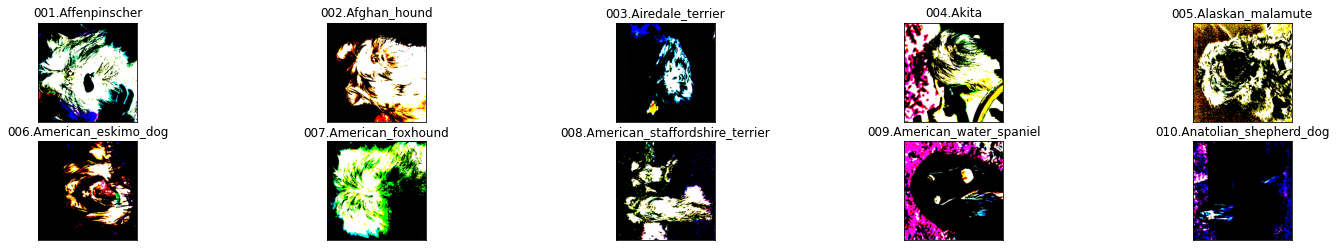

In [22]:
import os
import torch
from torchvision import datasets
from PIL import ImageFile


ImageFile.LOAD_TRUNCATED_IMAGES = True
### TODO: Write data loaders for training, validation, and test sets
batch_size = 20


## Specify appropriate transforms, and batch_sizes
normalizer = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
transformed = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(30),
    transforms.ToTensor(),
    normalizer,
])
transformed_test = transforms.Compose([
    transforms.Resize((299,299)),
    transforms.ToTensor(),
    normalizer,    
])

train_data = datasets.ImageFolder('/content/dogImages/train', transform=transformed)
test_data = datasets.ImageFolder('/content/dogImages/test', transform=transformed_test)
valid_data = datasets.ImageFolder('/content/dogImages/valid', transform=transformed)



train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size,  shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=0)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=0, shuffle=True)


## Visualizing

dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.numpy() 

#plot
fig = plt.figure(figsize=(25,4))
for idx in np.arange(10):
  ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
  plt.imshow(images[idx].T.astype('uint8'))
  ax.set_title(train_data.classes[idx])



 ### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [23]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg19_bn(pretrained=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

# freezing
for param in model_transfer.features.parameters():
  param.requires_grad = False


# getting last layer features
n_inputs =  model_transfer.classifier[6].in_features

#Define new linear layer
model_transfer.classifier[6] = nn.Sequential(
                      nn.Linear(n_inputs, 1000), 
                      nn.ReLU(),
                      nn.Dropout(0.4),
                      nn.Linear(1000, total_dog_breeds)).cuda()

# last_layer = nn.Linear(n_inputs,total_dog_breeds).cuda()

#replace last layer
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I choose VGG19_bn mode. As previously using pretrained model on dog images vgg19 was able to recognize 98% of dogs. May vgg19_bn works even more better.

Following are the steps that I follow to get final CNN Architecture:



1.   Choose model i.e (vgg_19)

2.   Frozen all parameters: In order to train to pretrained model i have frozen all parameters so that it wouldnt be retrained. 

3. Get last layer shape

4. Replace last fc layer to my custom layer i.e fully connected layer. I have chosen a sequential layer having 2 linear layer and 1 dropout layer in order to go more deeper because As we go more deeper, the more complex patterns we'll be able to recognize. 

5. Train model


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier[6].parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [25]:

#loaders scratch 
loaders_transfer = dict()
loaders_transfer['train'] = train_loader 
loaders_transfer['test'] = test_loader
loaders_transfer['valid'] = valid_loader


# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, '/content/drive/My Drive/model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(model_transfer.state_dict())

Epoch: 1 	Training Loss: 1.256721 	Validation Loss: 0.932323
Validation has decreased
Saving Model........
Epoch: 2 	Training Loss: 1.984283 	Validation Loss: 1.219880
Epoch: 3 	Training Loss: 1.890763 	Validation Loss: 0.356235
Validation has decreased
Saving Model........
Epoch: 4 	Training Loss: 0.832542 	Validation Loss: 0.619959
Epoch: 5 	Training Loss: 0.922600 	Validation Loss: 0.723307
Epoch: 6 	Training Loss: 0.821994 	Validation Loss: 0.526772
Epoch: 7 	Training Loss: 1.981686 	Validation Loss: 1.486750
Epoch: 8 	Training Loss: 1.144810 	Validation Loss: 0.662377
Epoch: 9 	Training Loss: 1.430111 	Validation Loss: 0.805883
Epoch: 10 	Training Loss: 0.647841 	Validation Loss: 0.744304


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [29]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.659019


Test Accuracy: 80% (676/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return None

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [0]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

NameError: name 'run_app' is not defined